# NLP Project - Sentiment Analysis of iPhone 16 Customer Reviews

### Project Objective: - Develop a machine learning model that performs binary sentiment classification on iPhone 16 customer reviews collected from Amazon.in website.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
from nltk.corpus import stopwords
from collections import Counter

## Load dataset

In [4]:
df = pd.read_excel('IPhone 16 all variants Amazon reviews.xlsx')
df

,Unnamed: 0,name,rating,review_text
0,0,Ashwani Jha,5.0 out of 5 stars,\nUpgrading to the iPhone 16 was an absolute b...
1,1,Alok,5.0 out of 5 stars,\nA good phone at a good price\n
2,2,Amazon Customer,5.0 out of 5 stars,\nBest product\n
3,3,Ali,4.0 out of 5 stars,"\nNice product,\n"
4,4,Asif ahmef,5.0 out of 5 stars,\nDefinately go for it......This colour also g...
...,...,...,...,...
348,348,Wajid Nazir,5.0 out of 5 stars,\nI recently upgraded to the iPhone 16 Pro Max...
349,349,Ayush Gaikwad,5.0 out of 5 stars,"\nVery good it is the best phone, i would alwa..."
350,350,GANESH KEYAL,1.0 out of 5 stars,"\niphone is mental same camra in iphone 14,15,..."
351,351,Bikash,5.0 out of 5 stars,"\nGreat product. Colour,design,camera is just ..."


## Understanding the features: -


#### 1. name: Registered names of the customers giving the reviews
#### 2. rating: Ratings provided by the customers
#### 3. review_text: Customer reviews on iPhone 16


## Exploratory Data Analysis (EDA)


#### 1. Initial EDA

In [5]:
# Let's check the datatypes of features
df.dtypes

,0
Unnamed: 0,int64
name,object
rating,object
review_text,object


In [6]:
# We can remove 'Unnamed: 0' feature as it is not adding any value to our project.
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Let's change the feature name 'review_text' to 'customer_reviews' for clear understanding

df.rename(columns={'review_text':'customer_reviews'}, inplace=True)

In [8]:
df

,name,rating,customer_reviews
0,Ashwani Jha,5.0 out of 5 stars,\nUpgrading to the iPhone 16 was an absolute b...
1,Alok,5.0 out of 5 stars,\nA good phone at a good price\n
2,Amazon Customer,5.0 out of 5 stars,\nBest product\n
3,Ali,4.0 out of 5 stars,"\nNice product,\n"
4,Asif ahmef,5.0 out of 5 stars,\nDefinately go for it......This colour also g...
...,...,...,...
348,Wajid Nazir,5.0 out of 5 stars,\nI recently upgraded to the iPhone 16 Pro Max...
349,Ayush Gaikwad,5.0 out of 5 stars,"\nVery good it is the best phone, i would alwa..."
350,GANESH KEYAL,1.0 out of 5 stars,"\niphone is mental same camra in iphone 14,15,..."
351,Bikash,5.0 out of 5 stars,"\nGreat product. Colour,design,camera is just ..."


In [9]:
# Check missing data in reviews feature

df.isna().sum()

,0
name,0
rating,0
customer_reviews,13


In [10]:
# We can see we have 13 missing values in the reviews column.
# We can simply remove these missing records as they are not in significantly higher number for our further analysis.

df.dropna(subset=['customer_reviews'], inplace=True)

In [11]:
# Checking missing values have been removed

df.isna().sum()

,0
name,0
rating,0
customer_reviews,0


In [12]:
# We can now see that the dataset don't have any missing record

In [13]:
# Let's reset the index after missing records removal

df.reset_index(drop=True, inplace=True)
df

,name,rating,customer_reviews
0,Ashwani Jha,5.0 out of 5 stars,\nUpgrading to the iPhone 16 was an absolute b...
1,Alok,5.0 out of 5 stars,\nA good phone at a good price\n
2,Amazon Customer,5.0 out of 5 stars,\nBest product\n
3,Ali,4.0 out of 5 stars,"\nNice product,\n"
4,Asif ahmef,5.0 out of 5 stars,\nDefinately go for it......This colour also g...
...,...,...,...
335,Wajid Nazir,5.0 out of 5 stars,\nI recently upgraded to the iPhone 16 Pro Max...
336,Ayush Gaikwad,5.0 out of 5 stars,"\nVery good it is the best phone, i would alwa..."
337,GANESH KEYAL,1.0 out of 5 stars,"\niphone is mental same camra in iphone 14,15,..."
338,Bikash,5.0 out of 5 stars,"\nGreat product. Colour,design,camera is just ..."


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# We can see there are no duplicate records extracted from the Amazon website.

In [16]:
# Extract numerical ratings from text and convert to float

df["rating"] = df["rating"].astype(str).str.extract(r"(\d+\.\d+)").astype(float)
df.head()

,name,rating,customer_reviews
0,Ashwani Jha,5.0,\nUpgrading to the iPhone 16 was an absolute b...
1,Alok,5.0,\nA good phone at a good price\n
2,Amazon Customer,5.0,\nBest product\n
3,Ali,4.0,"\nNice product,\n"
4,Asif ahmef,5.0,\nDefinately go for it......This colour also g...


In [17]:
# Import libraries for sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
analyzer = SentimentIntensityAnalyzer()

In [20]:
def analyze_sentiment(Data):
  scores = analyzer.polarity_scores(Data)
  if scores['compound'] >= 0.05:
    return 'Positive'
  else:
    return 'Negative'

In [21]:
# Creating a new feature to show sentiment class for all records in the dataset
df['sentiment'] = df['customer_reviews'].apply(analyze_sentiment)
df

,name,rating,customer_reviews,sentiment
0,Ashwani Jha,5.0,\nUpgrading to the iPhone 16 was an absolute b...,Positive
1,Alok,5.0,\nA good phone at a good price\n,Positive
2,Amazon Customer,5.0,\nBest product\n,Positive
3,Ali,4.0,"\nNice product,\n",Positive
4,Asif ahmef,5.0,\nDefinately go for it......This colour also g...,Positive
...,...,...,...,...
335,Wajid Nazir,5.0,\nI recently upgraded to the iPhone 16 Pro Max...,Positive
336,Ayush Gaikwad,5.0,"\nVery good it is the best phone, i would alwa...",Positive
337,GANESH KEYAL,1.0,"\niphone is mental same camra in iphone 14,15,...",Positive
338,Bikash,5.0,"\nGreat product. Colour,design,camera is just ...",Positive


#### 2. Text cleaning

In [22]:
# Let's clean the text by removing unnecessary characters, converting it to lowercase, split into words, remove common words,
# reduce words to their base form, and store the processed text for further use.

In [23]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words("english")) - {"not", "never", "no", "very", "too", "few", "more", "less"}
lemmatizer = WordNetLemmatizer()

In [25]:
def clean_text(text):
        text = re.sub(r'[^a-zA-Z\s]', '', text).lower() # Remove punctuation and convert to lowercase
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]) # Lemmatization & Remove stop words
        return text

In [26]:
# Generate a new feature with cleaned text of customer reviews
df['cleaned_reviews'] = df['customer_reviews'].apply(clean_text)
df

,name,rating,customer_reviews,sentiment,cleaned_reviews
0,Ashwani Jha,5.0,\nUpgrading to the iPhone 16 was an absolute b...,Positive,upgrading iphone absolute breeze apple refined...
1,Alok,5.0,\nA good phone at a good price\n,Positive,good phone good price
2,Amazon Customer,5.0,\nBest product\n,Positive,best product
3,Ali,4.0,"\nNice product,\n",Positive,nice product
4,Asif ahmef,5.0,\nDefinately go for it......This colour also g...,Positive,definately go itthis colour also give amezing ...
...,...,...,...,...,...
335,Wajid Nazir,5.0,\nI recently upgraded to the iPhone 16 Pro Max...,Positive,recently upgraded iphone pro max gb exceeded e...
336,Ayush Gaikwad,5.0,"\nVery good it is the best phone, i would alwa...",Positive,very good best phone would always consider buy...
337,GANESH KEYAL,1.0,"\niphone is mental same camra in iphone 14,15,...",Positive,iphone mental camra iphone world best phone sa...
338,Bikash,5.0,"\nGreat product. Colour,design,camera is just ...",Positive,great product colourdesigncamera wow battery b...


In [27]:
# Remove redundant feature -> customer_reviews

df.drop(columns=['customer_reviews'], inplace=True)

In [28]:
df.head()

,name,rating,sentiment,cleaned_reviews
0,Ashwani Jha,5.0,Positive,upgrading iphone absolute breeze apple refined...
1,Alok,5.0,Positive,good phone good price
2,Amazon Customer,5.0,Positive,best product
3,Ali,4.0,Positive,nice product
4,Asif ahmef,5.0,Positive,definately go itthis colour also give amezing ...


#### 3. Rating distribution

,count
rating,
5.0,193
1.0,65
4.0,52
3.0,20
2.0,10


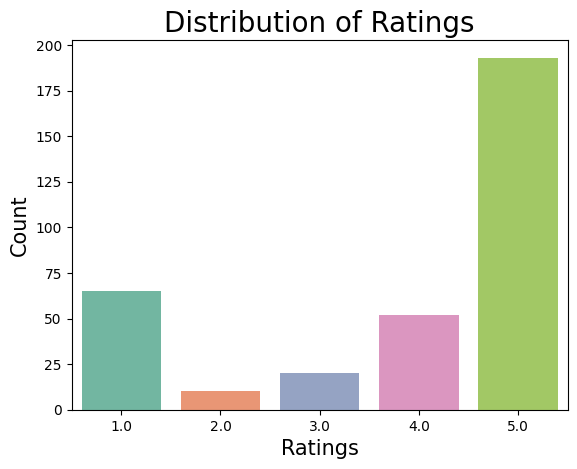

In [29]:
sns.countplot(x='rating', palette='Set2', data=df)
plt.title('Distribution of Ratings', size=20)
plt.xlabel('Ratings', size=15)
plt.ylabel('Count', size=15)

df['rating'].value_counts()

In [30]:
# Interpretation of Ratings Distribution: -

# 1. A large majority of the reviews (193 out of 340) have a rating of 5.0, indicating a strong positive sentiment
#    towards the product.
# 2. While positive ratings dominate, there's a notable number of 1.0 ratings (65), suggesting some users
#    have negative experiences.
# 3. The counts for ratings 2.0, 3.0, and 4.0 are relatively low compared to 1.0 and 5.0, implying most users
#    have either strongly positive or strongly negative opinions.

#### 4. Text length

In [31]:
# Creating the review length feature after text cleaning process and not before text cleaning because: -

# 1. By calculating review length after cleaning, we capture the length of the meaningful content. Cleaning removes noise
#    and irrelevant elements (punctuation, stop words) that don't contribute to the sentiment or overall meaning of the review.
# 2. Using the cleaned text for length calculation helps the model focus on the essential words and phrases that carry sentiment.
# 3. Since the sentiment analysis and other NLP tasks will be performed on the cleaned text, it makes sense to align the
#    review length feature with that same data to maintain consistency.

In [32]:
# Creating a new feature representing the length of the reviews

df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))
df

,name,rating,sentiment,cleaned_reviews,review_length
0,Ashwani Jha,5.0,Positive,upgrading iphone absolute breeze apple refined...,61
1,Alok,5.0,Positive,good phone good price,4
2,Amazon Customer,5.0,Positive,best product,2
3,Ali,4.0,Positive,nice product,2
4,Asif ahmef,5.0,Positive,definately go itthis colour also give amezing ...,25
...,...,...,...,...,...
335,Wajid Nazir,5.0,Positive,recently upgraded iphone pro max gb exceeded e...,172
336,Ayush Gaikwad,5.0,Positive,very good best phone would always consider buy...,14
337,GANESH KEYAL,1.0,Positive,iphone mental camra iphone world best phone sa...,13
338,Bikash,5.0,Positive,great product colourdesigncamera wow battery b...,13


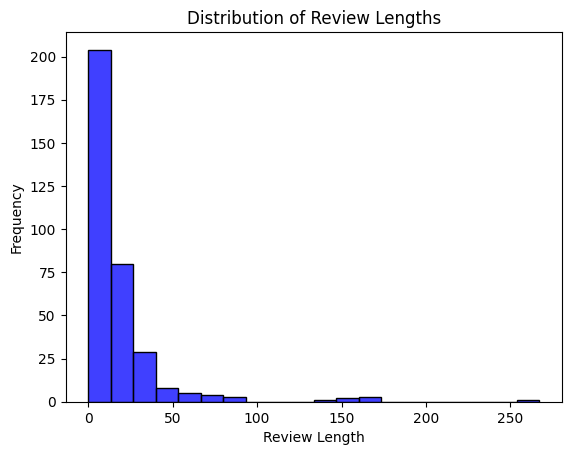

In [33]:
# Visualizing distribution of review lengths

sns.histplot(df['review_length'], bins = 20, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [34]:
# From above plot it is clear that most of the reviews have very few meaningful words.

#### 5. WordCloud & N-grams

In [35]:
# Let's generate Word Cloud to see high frequency words in the Iphone16 reviews

In [36]:
df['cleaned_reviews']

,cleaned_reviews
0,upgrading iphone absolute breeze apple refined...
1,good phone good price
2,best product
3,nice product
4,definately go itthis colour also give amezing ...
...,...
335,recently upgraded iphone pro max gb exceeded e...
336,very good best phone would always consider buy...
337,iphone mental camra iphone world best phone sa...
338,great product colourdesigncamera wow battery b...


In [37]:
# Let's prepare the customer review data for generating WordCloud by combining all reviews into a single,
# and space-separated string
txt = ' '.join(df['cleaned_reviews'])
txt

'upgrading iphone absolute breeze apple refined transition process making data transfer old iphone effortless few tap everythingfrom apps settingsmoved flawlessly making switch feel seamlessthe performance topnotch unparalleled smoothness navigation app responsiveness multitasking enhanced battery life display quality camera feature make worthy upgrade anyone looking best smartphone experienceif youre considering upgrade iphone wont disappoint apple continues set standard premium smartphones highly recommended good phone good price best product nice product definately go itthis colour also give amezing feelone more thing using iqoo zpro hz display iphone hz surprisingly feel like hz dont worry refresh rate beast device super happy purchase writing formally complain recent purchase iphone online amazoni received item day purchase upon unboxing noticed iphone came mismatched muddled box powered phone stuck hello screen repeatedly displaying hello multiple language completely unresponsive

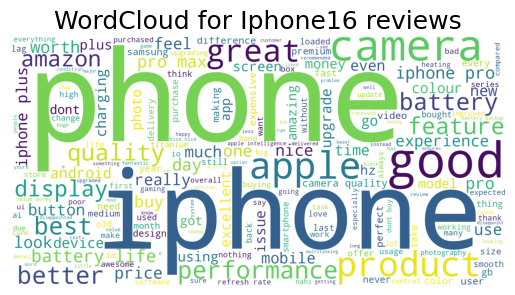

In [38]:
wc = WordCloud(background_color='white', height=1000, width=2000).generate(txt)

plt.title('WordCloud for Iphone16 reviews', size=18)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [39]:
# Applying N-grams technique to get frequency of most occuring words and word associations

def plot_ngrams(df, n=1):
  vectorizer = CountVectorizer(ngram_range=(n, n))
  ngrams = vectorizer.fit_transform(df['cleaned_reviews'])
  ngrams_freq = ngrams.sum(axis=0).A1 # .A1 attribute converts the matrix obtained in the previous step into a 1-dimensional NumPy array. This makes it easier to work with the frequency data.
  ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['Frequency'])
  ngrams_df = ngrams_df.sort_values(by='Frequency', ascending=False)
  ngrams_df = ngrams_df.head(20)


  plt.figure(figsize=(15,10))
  sns.barplot(x='Frequency', y=ngrams_df.index, data=ngrams_df, palette='viridis')
  plt.title(f'Top 20 {n}-grams')
  plt.show()

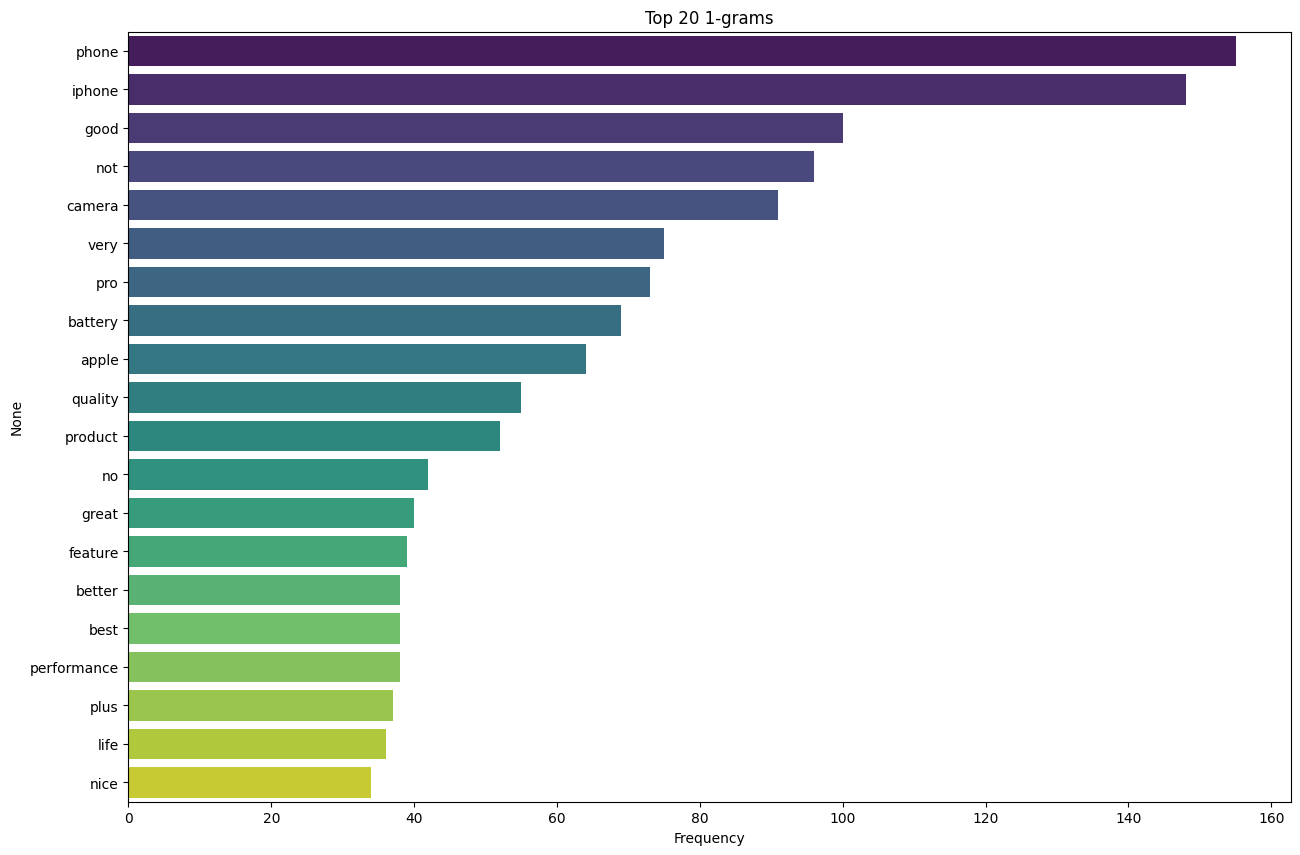

In [40]:
# Unigrams
plot_ngrams(df, n=1)

In [41]:
# Conclusion from WordCloud and Unigram bar plot: -

# 1. Prominent words: The words that appear larger in the word cloud, such as 'phone', 'good' and 'iphone'
#    indicate that these are the most frequently mentioned words in the customer reviews.

# 2. Overall sentiment: The prominent presence of positive words like 'good', 'great', 'best' and 'nice' suggests a generally positive sentiment
#    towards the iPhone 16 among customers.

# 3. Key themes: The prominent words related to features like 'camera', 'battery' and 'display' highlight the key aspects
#    that customers focus on when reviewing the iPhone 16.

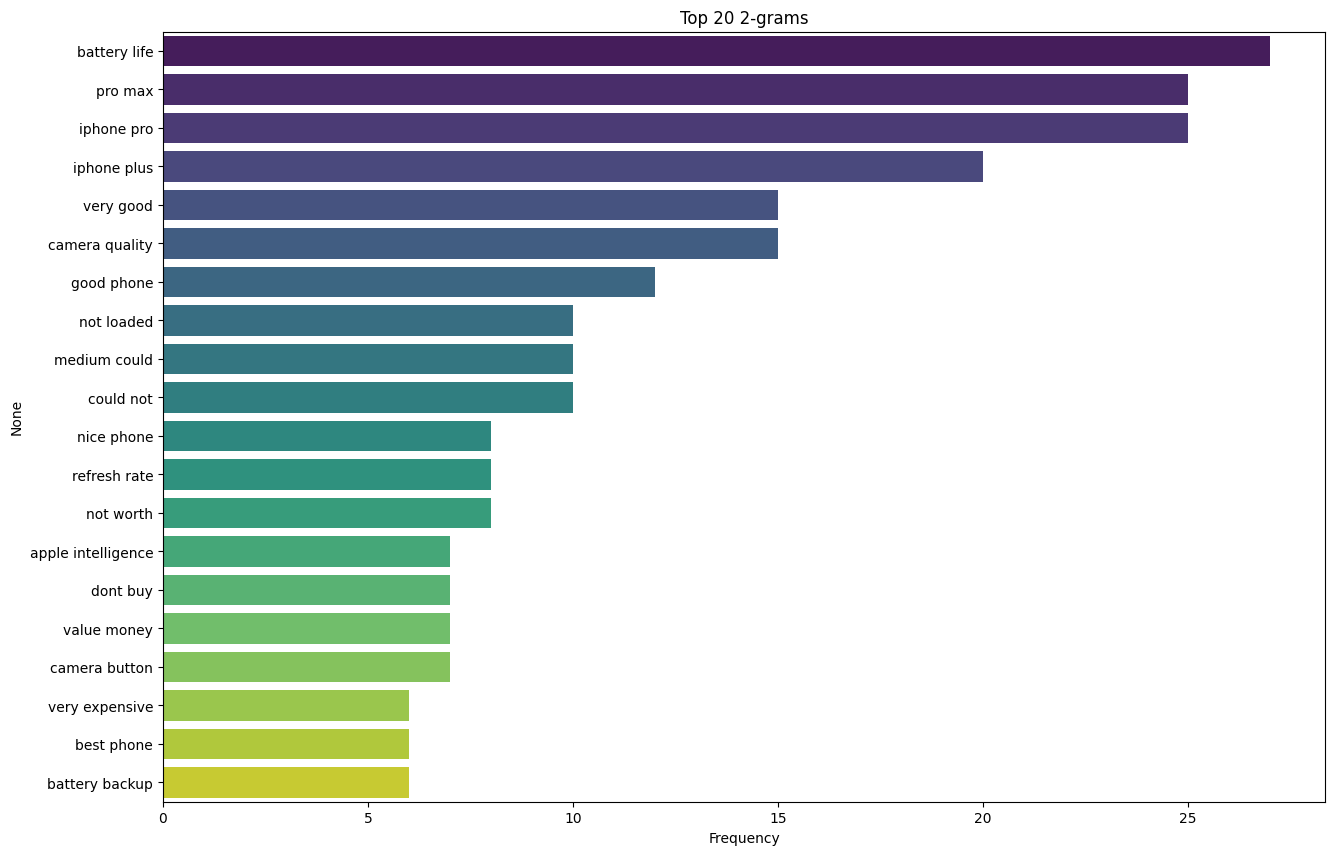

In [42]:
# Let's find out most frequent word associations in the reviews (Bi-grams)

plot_ngrams(df, n=2)

In [43]:
# Most frequently occuring Bi-grams include 'battery life', 'pro max', 'iphone pro', 'iphone plus', 'very good', 'camera quality'
# and 'good phone'. This data suggests that there is a general positive sentiment in the reviews as in unigrams and bigrams data
# most frequently occuring words/phrases express a positive sentiment.

# This inference need to be further validated using Sentiment Distribution Analysis.

#### 6. Sentiment Distribution Analysis

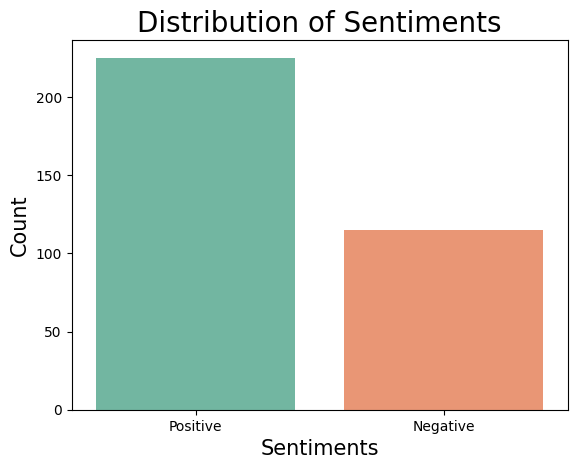

,count
sentiment,
Positive,225
Negative,115


In [44]:
# Get the distribution of sentiments

sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiments', size=20)
plt.xlabel('Sentiments', size=15)
plt.ylabel('Count', size=15)
plt.show()

df['sentiment'].value_counts()

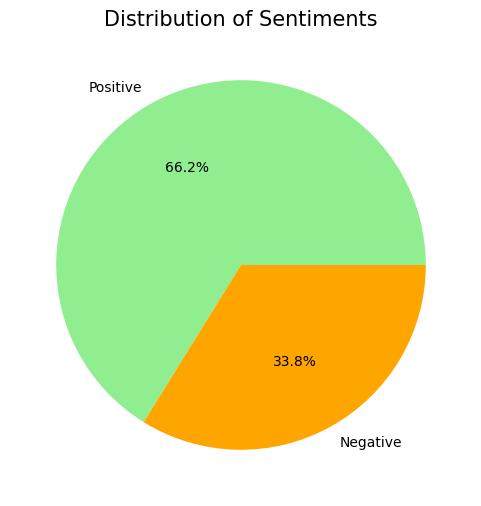

In [45]:
# Visualizing sentiment distribution using pie chart

df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['lightgreen', 'orange'])
plt.title('Distribution of Sentiments', size=15)
plt.ylabel('')
plt.show()

In [46]:
# Observations from Sentiment Distribution Analysis of iPhone16 reviews: -

# 1. Positive: 66.2% of the reviews expressed a positive sentiment towards the iPhone 16.
# 2. Negative: 33.8% of the reviews expressed a negative sentiment towards the iPhone 16.

### Inference from Sentiment Distribution Analysis:

##### Overall, the sentiment analysis suggests that customer sentiment towards the iPhone 16 is predominantly positive.This indicates a generally favorable reception of the product by the majority of users. However, it is important to acknowledge the presence of negative sentiments as well and it is advisable to continuously monitor the customer feedback and conduct regular sentiment analysis to track the evolving perceptions of the iPhone 16 in the market.

## Model Building

#### 1. TF-IDF

In [47]:
# Import necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['cleaned_reviews']) # Input

In [49]:
y = df['sentiment'] # Output

In [50]:
# Split train and test dataset

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, shuffle=True)

In [51]:
# Now, let's train a sentiment classifier.

#### 2. Selecting the best sentiment classifier model

In [1]:
# Importing necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [53]:
# Define models and hyperparameters

models = {
    'Logistic Regression' : {
    'model' : LogisticRegression(), 'params' : {'C' : [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'] }
    },

    'SVM' : {
    'model' : SVC(), 'params' : {'C' : [0.1, 1, 10, 100], 'kernel' : ['linear', 'rbf', 'poly']}
    },

    'Naive_Bayes' : {
    'model' : MultinomialNB(), 'params' : {}
    },

    'Random Forest' : {
    'model' : RandomForestClassifier(), 'params' : {'n_estimators' : [50, 100, 200], 'max_depth' : [5, 6, 7]}
    }
}

In [206]:
# Train and evaluate models

best_model = None
best_accuracy = 0
best_params = {}

for model_name, model_data in models.items():
  grid_search = GridSearchCV(model_data['model'], model_data['params'], cv=5, scoring = 'accuracy')
  grid_search.fit(X_train_tfidf, y_train)

  y_pred = grid_search.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)

  print(f"{model_name}: ")
  print(f"Best Parameters: {grid_search.best_params_}")
  print(f"Accuracy: {accuracy}")
  print(classification_report(y_test, y_pred))

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model_name
    best_params = grid_search.best_params_

print(f"\n Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters: {best_params}")

Logistic Regression: 
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8529411764705882
              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78        23
    Positive       0.89      0.89      0.89        45

    accuracy                           0.85        68
   macro avg       0.84      0.84      0.84        68
weighted avg       0.85      0.85      0.85        68

SVM: 
Best Parameters: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.8676470588235294
              precision    recall  f1-score   support

    Negative       0.77      0.87      0.82        23
    Positive       0.93      0.87      0.90        45

    accuracy                           0.87        68
   macro avg       0.85      0.87      0.86        68
weighted avg       0.87      0.87      0.87        68

Naive_Bayes: 
Best Parameters: {}
Accuracy: 0.6911764705882353
              precision    recall  f1-score   support

    Negative       0.75    

In [64]:
# Printing accuracies for all the models

lr_accuracy = 0.85  # Logistic Regression Model accuracy
svm_accuracy = 0.87 # SVM Model accuracy
nb_accuracy = 0.69  # Naive Bayes Model accuracy
rf_accuracy = 0.66  # Random Forest Model accuracy

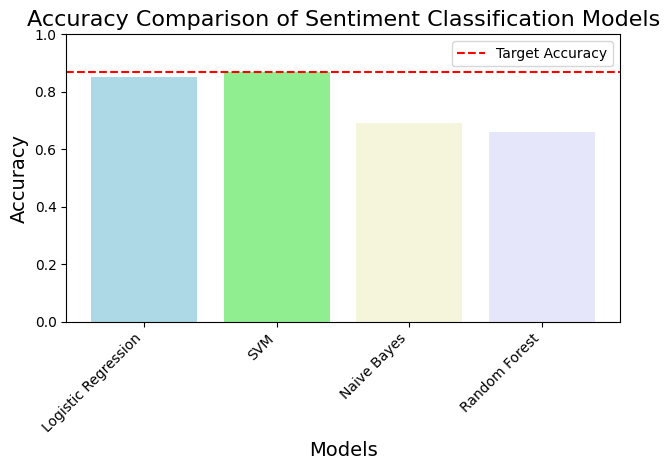

In [72]:
# Visualize accuracies of all sentiment classification models applied in our analysis

models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest']
accuracies = [lr_accuracy, svm_accuracy, nb_accuracy, rf_accuracy]

plt.bar(models, accuracies, color=['lightblue', 'lightgreen', 'beige', 'lavender'])
plt.title('Accuracy Comparison of Sentiment Classification Models', size=16)
plt.xlabel('Models', size=14)
plt.ylabel('Accuracy', size=14)
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.axhline(y=0.87, color='red', linestyle='--', label='Target Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
# From above bar chart of all models, it is clear that SVM provides a better model with high accuracy
# and high f1-scores for positive and negative sentiments.

#### 3. Initiating SVM model to further apply for model deployment.

In [63]:
SVM = SVC(C = 10, kernel = 'linear')
SVM.fit(X_train_tfidf, y_train)

SVC(C=10, kernel='linear')

In [64]:
y_pred = SVM.predict(X_test_tfidf)

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.87      0.82        23
    Positive       0.93      0.87      0.90        45

    accuracy                           0.87        68
   macro avg       0.85      0.87      0.86        68
weighted avg       0.87      0.87      0.87        68



### Observations from classification report of SVM model:

Negative Class:

1. Precision: 0.77
2. Recall: 0.87
3. F1-score: 0.82

Positive Class:
1. Precision: 0.93
2. Recall: 0.87
3. F1-score: 0.90


Overall Accuracy: 0.87 (87%)



## Inference on Text Classification Model (SVM):

#### 1. High precision and recall: The model demonstrates high precision and recall for both Positive and Negative classes, indicating a strong ability to accurately identify these sentiments.
#### 2. Good Accuracy: The model is performing well overall, with an accuracy of 0.87, indicating it correctly classifies 87% of the reviews.
#### 3. Balanced Performance: The F1-scores for both positive and negative classes are relatively balanced (0.90 and 0.82, respectively), indicating a consistent performance in classifying both sentiment categories.

## Conclusion:
#### The sentiment classification model (SVM), demonstrates strong overall performance, accurately classifying sentiments and exhibiting a robust ability to distinguish between positive and negative reviews. Its high precision, recall, and accuracy make it a reliable tool for sentiment analysis.

## Business Implications:

### Leveraging Positive Sentiments:

#### 1. Strengthen Brand Reputation: The predominantly positive sentiment towards the iPhone 16 reinforces its strong brand image and can be leveraged to attract new customers and retain existing ones.
#### 2. Drive Sales and Revenue: Positive customer sentiment is a key driver of purchase decisions, and highlighting positive reviews can boost sales and revenue for the iPhone 16.
#### 3. Enhance Marketing and Communications: Sentiment analysis insights can be used to tailor marketing campaigns, highlighting features and aspects that resonate most with customers (like camera, battery life and display) leading to increased engagement and conversion rates.
#### 4. Build Customer Loyalty: Positive customer experiences foster loyalty and advocacy, leading to repeat purchases and positive word-of-mouth marketing.


### Addressing Negative Sentiments:

#### 1. Improve Product and Service Offerings: By understanding customer pain points, businesses can prioritize product improvements and service enhancements to better meet customer needs and expectations.
#### 2. Enhance Customer Support: Sentiment analysis can help identify customers expressing negative sentiments, enabling businesses to proactively engage with them and offer solutions or support to improve their experience.
#### 3. Prevent Customer Churn: Addressing negative sentiment effectively can help prevent customers from switching to competitors, reducing churn and retaining valuable customers.

## Save pickle files for further model deployment process

In [282]:
import pickle

In [283]:
# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save SVM model
with open('SVM.pkl', 'wb') as f:
    pickle.dump(SVM, f)